### __BUSA8001 Group Assignment - Predicting Airbnb Listing Prices in Melbourne__ {-}

--- 

**Kaggle Competition Ends:** Friday, 4 November 2022 @ 3:00pm (Week 13)  
**Assignment Due Date on iLearn:** Friday, 4 November 2022 @ 11.59pm (Week 13)   

**Overview:**   

- In the group assignment you will form a team of up to 3 students (minimum 2) and participate in a forecasting competition on Kaggle
- The goal is to predict listed prices of Airbnb properties in Melbourne based on various Airbnb characteristics and regression models

- You will:  
    - Write a problem statement and perform Exploratory Data Analysis  
    - Clean up data, deal with categorical features and missing observations, and create new variables (feature engineering)  
    - Construct and tune forecasting models, produce forecasts and submit your predictions to Kaggle  
    - Each member of the team will record a video presentation of their work  
    - Marks will be awarded producing a prediction in the top 5 positions of their unit as well as for reaching the highest ranking on Kaggle amongst all teams.

**Instructions:** 

- Form a team of 3 students (minimum 2 students)  
- Each team member needs to join [https://www.kaggle.com](https://www.kaggle.com/)  
- Choose a team leader and form a team in the competition [https://www.kaggle.com/t/0854c07cc3ac4037920a9fa4cdebacd1](https://www.kaggle.com/t/0854c07cc3ac4037920a9fa4cdebacd1)
    - Team leader to click on `team` and join and invite other team members to join
    - Your **team's name must start** with your unit code, for instance you could have a team called BUSA8001_masterful_geniuses 
- All team members should work on all the tasks listed below however   
    - **Choose a team member who will be responsible for one of each of the 3 tasks listed below**    

**Marks**: 

- Total Marks: 40
- Your individual mark will consist of:  
    - 50% x overall assignment mark + 45% x mark for the task that you are responsible for + 5% x mark received from your teammates for your effort in group work 
- 7 marks will be deducted from each Task for which there is no video presentation 

**Competition Marks:**  

- 2 marks: Ranking in the top 5 places of your unit on Kaggle (make sure you name your team as instructed above)   
- 2 marks: Reaching the first place in your unit  (make sure you name your team as instructed above)   


**Submissions:**  

1. On Kaggle: submit your team's forecast in order to be ranked by Kaggle
    - Can do this as many times as necessary while building their model  
2. On iLearn **only team leader to submit** this Jupyter notebook re-named `Group_Assignment_Team_Name.ipynb` where Team_Name is your team's name on Kaggle   
    - The Jupyter notebook must contain team members names/ID numbers, and team name in the competition
    - Provide answers to the 3 Tasks below in the allocated cells including all codes/outputs/writeups 
    - One 15 minute video recording of your work 
        - Each team member to provide a 5 minute presentation of the Task that they led (it is best to jointly record your video using Zoom)
        - When recording your video make sure your face is visible, that you share your Jupyter Notebook and explain everything you've done in the submitted Jupyter notebook on screen
        - 7 marks will be deducted from each Task for which there is no video presentation or if you don't follow the above instructions
        
3. On iLearn each student needs to submit a file with their teammates' names, ID number and a mark for their group effort (out of 100%)



---

**Fill out the following information**

For each team member provide name, Student ID number and which task is performed below

- Team Name on Kaggle: TheNoobsters
- Team Leader and Team Member 1: Raj Katare - 46843302
- Team Member 2: Shobhit Kumar Ravi - 46304002
- Team Member 3: Kunal Upreja - 46810749

---

## Task 1: Problem Description and Initial Data Analysis {-}

1. Read the Competition Overview on Kaggle [https://www.kaggle.com/t/0854c07cc3ac4037920a9fa4cdebacd1](https://www.kaggle.com/t/0854c07cc3ac4037920a9fa4cdebacd1)
2. Referring to Competition Overview and the data provided on Kaggle write about a 500 words **Problem Description** focusing on key points that will need to be addressed as first steps in Tasks 2 and 3 below, using the following headings:
    - Forecasting Problem
    - Evaluation Criteria
    - Types of Variables/Features
    - Data summary and main data characteristics
    - Missing Values (only explain what you found at this stage)
    - Note: you should **not** discuss any specific predictive algorithms at this stage.
    
Total Marks: 12


# Problem Description

In the given assignment, we are required to predict listed prices of Airbnb based on various Airbnb characteristics that are given and using the regression models. Firstly, to understand the concept of Airbnb, it is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodation in the specific location. Airbnb is a concept where the Airbnb doesn’t provide their own properties rather it acts as a medium between the two parties in which one rents out the property and the other one rents the property on the price as set by the lender. Airbnb’s majority of revenues comes from service fees from bookings charged to both the hosts and the guests. But Airbnb suggests a price to the host that they can offer to the guests based on various factors of the property such as location, size etc. Therefore, in this assignment, we are supposed to predict the prices that hosts can list on their property using the given features of the property.

The dataset was composed of categorical and numerical variables. In the dataset provided, we are given a total of 60 columns, but we will not be taking all the features rather we will only be considering the features that are necessary in determining the prices of the listings. We took total of 14 features and converted the datatypes of the variable wherever it was necessary to perform the predictions. We have also plotted a correlation heatmap between the 14 features which will help us to perform the further predictions.

We have done some data imputation as well so that we can use the dataset according to our requirement. The columns with the numerical values are imputed by filling the missing values with either mean or median of the remaining values of that column whereas the categorical/string values are imputed by filling the missing values with mode of the remaining values of that column. Furthermore, we have chosen ‘boxplot’ graph to detect the outliers for the ‘price’ column more accurately. 

The major task is to find the best predicting machine learning algorithm for this problem. To do that, we will be using three algorithms namely logistic regression, decision tree regression, and random forest regressor and then we will be evaluating their Mean Squared Errors and compare them to predict the prices for the listings that are given to us in the dataset. The degree of inaccuracy in statistical models is measured by the negative mean squared error, or MSE. Between the observed and projected values, it evaluates the average squared difference. The MSE is equal to 0 when a model is error-free. Its value increases when model error does as well.

In [36]:
#Importing the necessary libraries for the plotting and predictions
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [37]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape)
print(test.shape)
df = train.iloc[:,:-1].copy()
y = train.iloc[:,-1].copy()
#Creating a target variable y which contains the price column
y = pd.DataFrame(y, columns=["price"])
df = pd.concat([df, test])
df.shape

(7000, 61)
(3000, 60)


(10000, 60)

In [38]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   price   7000 non-null   object
dtypes: object(1)
memory usage: 54.8+ KB


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 2999
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID                                            10000 non-null  int64  
 1   source                                        10000 non-null  object 
 2   name                                          9999 non-null   object 
 3   description                                   9924 non-null   object 
 4   neighborhood_overview                         6739 non-null   object 
 5   host_name                                     10000 non-null  object 
 6   host_since                                    10000 non-null  object 
 7   host_location                                 7924 non-null   object 
 8   host_about                                    6269 non-null   object 
 9   host_response_time                            9612 non-null   

In [40]:
df.describe()

,ID,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,9560.000000,9903.000000,10000.00000,10000.000000,9945.000000,...,9831.000000,9831.000000,9832.000000,9831.000000,9831.000000,10000.000000,10000.000000,10000.000000,10000.000000,9877.000000
mean,4999.50000,15.693000,-37.826836,145.030633,3.842200,1.786506,2.246087,4.72190,675.769800,4.372851,...,4.684985,4.806757,4.819058,4.841014,4.676109,12.601000,9.231600,3.287600,0.033500,1.585362
std,2886.89568,43.682728,0.082002,0.172307,2.473603,1.041520,1.716274,27.85186,1108.161894,25.162592,...,0.449856,0.365809,0.386729,0.302999,0.413242,32.384238,18.253364,21.001919,0.409139,1.791966
min,0.00000,1.000000,-38.325610,144.506620,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2499.75000,1.000000,-37.855995,144.956700,2.000000,1.000000,1.000000,1.00000,100.000000,1.000000,...,4.580000,4.760000,4.800000,4.800000,4.590000,1.000000,1.000000,0.000000,0.000000,0.420000
50%,4999.50000,2.000000,-37.818640,144.978685,4.000000,1.000000,2.000000,2.00000,1100.000000,2.000000,...,4.820000,4.930000,4.950000,4.920000,4.780000,2.000000,1.000000,0.000000,0.000000,1.050000
75%,7499.25000,11.000000,-37.801130,145.044110,5.000000,2.000000,3.000000,3.00000,1125.000000,3.000000,...,4.970000,5.000000,5.000000,5.000000,4.910000,8.000000,7.000000,1.000000,0.000000,2.190000
max,9999.00000,1091.000000,-37.486450,145.850230,16.000000,10.000000,22.000000,1125.00000,99999.000000,999.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,230.000000,179.000000,168.000000,13.000000,49.270000


In [41]:
df['bathrooms'].unique()

array(['1 bath', '1 private bath', '1 shared bath', '2.5 baths',
       '1.5 baths', nan, '1.5 shared baths', '2 baths', '3 baths',
       '6 baths', '5 baths', '3.5 baths', '0 shared baths', 'Half-bath',
       'Shared half-bath', '0 baths', '3 shared baths', '2 shared baths',
       '2.5 shared baths', '4 baths', '9.5 baths', '4.5 baths',
       '4 shared baths', '5.5 shared baths', '5 shared baths',
       '3.5 shared baths', 'Private half-bath', '5.5 baths',
       '10.5 shared baths', '6.5 baths', '9 baths', '10 baths',
       '8.5 baths'], dtype=object)

In [7]:
#detecting the NULL values in the df
df.isnull().sum()

ID                                                 0
source                                             0
name                                               1
description                                       76
neighborhood_overview                           3261
host_name                                          0
host_since                                         0
host_location                                   2076
host_about                                      3731
host_response_time                               388
host_response_rate                               388
host_acceptance_rate                             391
host_is_superhost                                  0
host_neighbourhood                              5554
host_listings_count                                0
host_verifications                                 0
host_has_profile_pic                               0
host_identity_verified                             0
neighbourhood                                 

---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering {-}
- In this task you will follow a set of instructions/questions listed below.
- Make sure you **explain** each step you do both in Markdown text and on your video.
    - Do not just read out your commands without exaplaining what they do and why you used them 

Total Marks: 12

**Task 2, Question 1**: Clean **all** numerical features and the target variable `price` so that they can be used in training algorithms. For instance, `host_response_rate` feature is in object format containing both numerical values and text. Extract numerical values (or equivalently eliminate the text) so that the numerical values can be used as a regular feature.  
(2 marks)

In [8]:
# Selecting the meaningful features from the dataset which can help the most in predicting the price
selected_features = ['accommodates', 'availability_30', 'bathrooms', 'beds', 'calculated_host_listings_count',
                     'host_is_superhost', 'host_response_time', 'host_response_rate', 'last_review', 'minimum_nights', 'maximum_nights',
                     'reviews_per_month','review_scores_cleanliness','review_scores_location',
                    'room_type']
df_new = df[selected_features]
df_new.head(2)

,accommodates,availability_30,bathrooms,beds,calculated_host_listings_count,host_is_superhost,host_response_time,host_response_rate,last_review,minimum_nights,maximum_nights,reviews_per_month,review_scores_cleanliness,review_scores_location,room_type
0,2,27,1 bath,1.0,2,f,within a few hours,100%,3/09/2022,2,180,0.15,4.13,4.47,Entire home/apt
1,2,30,1 bath,2.0,1,f,a few days or more,0%,12/09/2015,1,365,0.03,5.00,4.50,Private room


In [9]:
#replacing the $ in the price feature and keeping the numerical value as float and maintiang the consistency in the feature
y['price'] = y['price'].str.replace(',','').str.replace('$','').astype('float')

#replacing the % in the host_response_rate feature and keeping the string value as float
df_new['host_response_rate'] = df_new['host_response_rate'].str.replace('%','').astype('float')



In [10]:
#df_new['bathrooms'].unique()

In [11]:
#host_is_superhost is string is converted to boolean values of TRUE and FALSE
df_new['host_is_superhost'] = df_new['host_is_superhost'].map({'t':1 , 'f': 0})


#Converting the 3 values in a symmetric format
df_new['bathrooms'] = df_new['bathrooms'].str.replace('Shared half-bath', '0.5 shared')
df_new['bathrooms'] = df_new['bathrooms'].str.replace('Private half-bath', '0.5 private')
df_new['bathrooms'] = df_new['bathrooms'].str.replace('Half-bath', '0.5 bath')

#Symmetrically arranging the bathrooms feature
df_new['bathrooms_shared'] = df_new['bathrooms'].str.contains('shared')
df_new['bathrooms_private'] = df_new['bathrooms'].str.contains('private')

#converting the values into float
df_new['bathrooms'] = df_new['bathrooms'].str.split(' ').str[0].astype(float)



**Task 2, Question 2** Create at least 4 new features from existing features which contain multiple items of information, e.g. creating `email`,  `phone`, `work_email`, etc. from feature `host_verifications`.  
(2 marks)

In [12]:
#last review is originally in string, which is being converted to date time type
df_new.last_review = pd.to_datetime(df_new['last_review'])
df_new['last_review_year'] = df_new['last_review'].dt.year
df_new['last_review_month'] = df_new['last_review'].dt.month
df_new['last_review_day'] = df_new['last_review'].dt.day
df_new.drop('last_review', axis=1, inplace=True)




In [13]:
#df_new.head()

**Task 2, Question 3**: Impute missing values for all features in both training and test datasets.   
(3 marks)

In [14]:
#imputing the values with the means and medians for the numerical features
df_impute = df_new.copy()
df_impute['beds'] = df_impute.beds.fillna(value = np.nanmedian(df_impute.beds))
df_impute['review_scores_location'] = df_impute.review_scores_location.fillna(df_impute.review_scores_location.mean())
df_impute['review_scores_cleanliness'] = df_impute.review_scores_cleanliness.fillna(df_impute.review_scores_cleanliness.mean())
df_impute['reviews_per_month'] = df_impute.reviews_per_month.fillna( df_impute.reviews_per_month.mean())
#df_impute.head()


pd.value_counts(df_new['bathrooms'])
df_impute['bathrooms'] = df_impute['bathrooms'].fillna(1.0)

pd.value_counts(df_new['room_type'])
df_impute['room_type'] = df_impute.room_type.fillna('Entire home/apt')

#highest occuring value in the dataset for both room_type and host_response_time
pd.value_counts(df_new['host_response_time'])

# Using mode to replace missing values
df_impute['host_response_time'] = df_impute.host_response_time.fillna('within an hour')


df_impute.isnull().sum()

accommodates                        0
availability_30                     0
bathrooms                           0
beds                                0
calculated_host_listings_count      0
host_is_superhost                   0
host_response_time                  0
host_response_rate                388
minimum_nights                      0
maximum_nights                      0
reviews_per_month                   0
review_scores_cleanliness           0
review_scores_location              0
room_type                           0
bathrooms_shared                   10
bathrooms_private                  10
last_review_year                  123
last_review_month                 123
last_review_day                   123
dtype: int64

**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class. 


Where a categorical feature contains more than 5 unique values, map the features into 5 most frequent values + 'other' and then encode appropriately. For instance, you could group then map `property_type` into 5 basic types + 'other': [entire rental unit, private room, entire room, entire towehouse, shared room, other] and then encode.  
(2 marks)

In [15]:
#re-splitting the training and testing dataset into the original format 
eda_df = df_impute.iloc[:7000,:].copy()
eda_df.dropna(inplace = True)
eda_df.shape

(6991, 19)

In [16]:
#performing get_dummies on 'host_response_time' and 'room_type' columns as taught in class
host_response_time_dummy = pd.get_dummies(df_impute['host_response_time'], prefix="host_response_time", prefix_sep="_" )

df_impute = pd.concat([df_impute,host_response_time_dummy], axis = 1)
df_impute = df_impute.drop('host_response_time', axis=1)

room_type_dummy = pd.get_dummies(df_impute['room_type'], prefix="room_type", prefix_sep="_" )
df_impute = pd.concat([df_impute,room_type_dummy], axis = 1)
df_impute = df_impute.drop('room_type', axis=1)

df_impute.head(2)

,accommodates,availability_30,bathrooms,beds,calculated_host_listings_count,host_is_superhost,host_response_rate,minimum_nights,maximum_nights,reviews_per_month,...,last_review_month,last_review_day,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,2,27,1.0,1.0,2,0,100.0,2,180,0.15,...,3.0,9.0,0,0,1,0,1,0,0,0
1,2,30,1.0,2.0,1,0,0.0,1,365,0.03,...,12.0,9.0,1,0,0,0,0,0,1,0


In [17]:
X = df_impute.iloc[:7000,:].copy()
test_X = df_impute.iloc[7000:,:].copy()

**Task 2, Question 5**: Perform any other actions you think need to be done on the data before constructing predictive models, and clearly explain what you have done.   
(1 marks)

In [35]:
#dropping the null values 
X = pd.concat([X,y], axis=1)
X.dropna(inplace=True)
X.shape
#X.head()



(6991, 28)

<AxesSubplot:xlabel='price'>

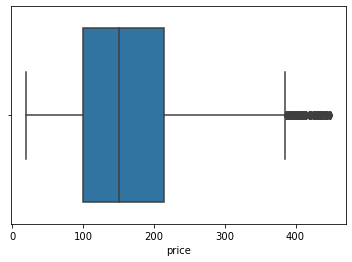

In [19]:
#plotting the boxplot of price feature to detect outliers
sns.boxplot(X.price[X.price<450])


In [20]:
#As we observe, the outliers start from approximately after 390 but the cluster of points are breaking after 410. So we clip at 420
X_outlier_removed = X[X.price < 420]
y_outlier_removed = X_outlier_removed.iloc[:,-1].copy()
X_outlier_removed = X_outlier_removed.iloc[:,:-1].copy()

In [21]:
#scalling the data where the outliers are removed
scaler = MinMaxScaler()
X_scaled_outliers_rm = pd.DataFrame(scaler.fit_transform(X_outlier_removed))

In [22]:
y = X.iloc[:,-1].copy()
X = X.iloc[:,:-1].copy()

X_scaled = pd.DataFrame(scaler.fit_transform(X))

**Task 2, Question 6**: Perform exploratory data analysis to measure the relationship between the features and the target and write up your findings. 
(2 marks)

<AxesSubplot:xlabel='price', ylabel='room_type'>

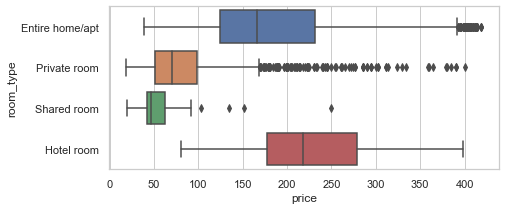

In [23]:
#detecting the outliers of the price of the different values of the 'room_type' column using boxplot
sns.set(rc={'figure.figsize' : (7,3)}, style = "whitegrid")
feature_set = pd.concat([eda_df,y], axis=1)
sns.boxplot(data = feature_set[feature_set.price < 420] , y = 'room_type', x = 'price' )

The above boxplot shows the relation between the price with respect to different room types. As observed, the prices of the 'Entire home/apt' and 'Hotel room' is higher than the 'Private room' and 'Shared room'. However, the range of outliers for the 'Private room' and 'Shared room' is much higher than that of 'Entire home/apt'. There are no ouliers observed in the 'Hotel room' room type.

accommodates                     -0.003790
availability_30                   0.002357
bathrooms                        -0.015775
beds                             -0.005343
calculated_host_listings_count    0.019469
host_is_superhost                -0.002749
host_response_rate                0.014344
minimum_nights                    0.024680
maximum_nights                   -0.004438
reviews_per_month                -0.032257
review_scores_cleanliness        -0.005446
review_scores_location           -0.008939
last_review_year                 -0.021761
last_review_month                 0.062701
last_review_day                   1.000000
Name: last_review_day, dtype: float64


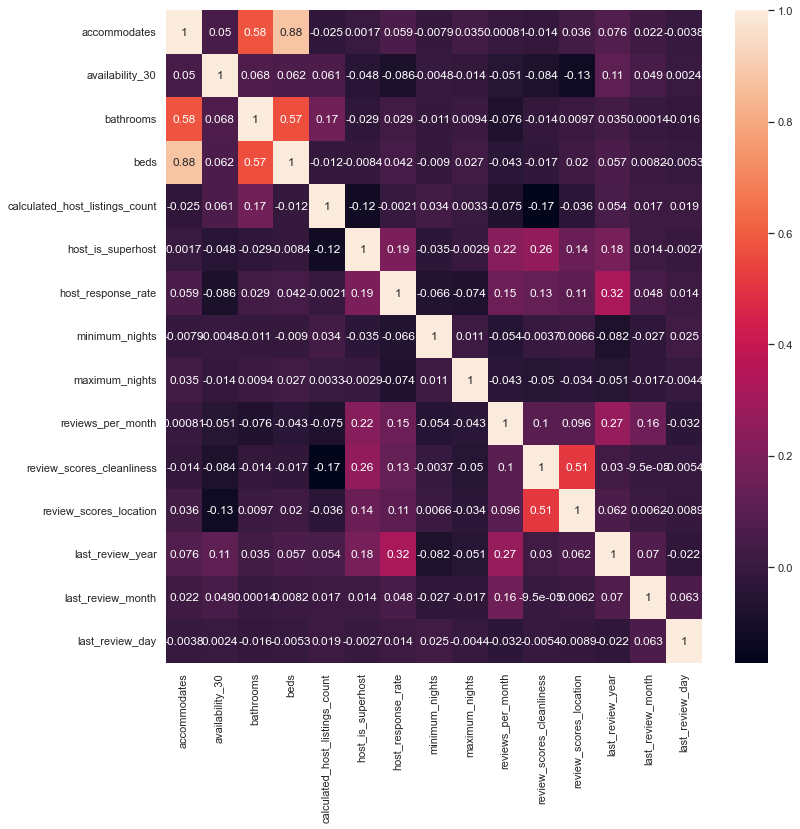

In [24]:
#Exploring the correlation of the features though correlation heatmap
sns.set(rc={'figure.figsize' : (12,12)}, style = "whitegrid")
print(df_new.corr().iloc[:,-1]) # Correlation with price
sns.heatmap(df_new.corr(), annot=True);

--- 
## Task 3: Fit and tune a forecasting model/Submit predictions/Report score and ranking {-}

Make sure you **clearly explain each step** you do, both in text and on the recoded video.

1. Build a machine learning (ML) regression model taking into account the outcomes of Tasks 1 & 2 (Explain carefully)
2. Fit the model and tune hyperparameters via cross-validation: make sure you comment and explain each step clearly
3. Create predictions using the test dataset and submit your predictions on Kaggle's competition page
4. Provide Kaggle ranking and **score** (screenshot your best submission) and Comment
5. Make sure your Python code works, so that a marker that can replicate your all of your results and obtain the same RMSE from Kaggle

- Hint: to perform well you will need to iterate Task 3, building and tuning various models in order to find the best one.

Total Marks: 12

In [25]:
#performing the cross-validation to achieve the best hyper-parameter based on the three models below
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=142)

In [26]:
#performing decision tree regressor model
model = DecisionTreeRegressor()


space = {
    'max_depth': [50, 60, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [ 5, 10]}

#retrieving the accuracy of the model with the help of negative mean squared error method
search_dt = RandomizedSearchCV(model, space, n_iter=100, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, random_state=142)

#fitting the model with the outliers removed
result = search_dt.fit(X_outlier_removed, y_outlier_removed);


print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -4677.16812668025
Best Hyperparameters: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 100}


In [27]:
#performing the linear regression model 
model = LinearRegression()

space = dict()
space['fit_intercept'] = [True, False]

#the model will iterate 500 times with random state 142
search_lr = RandomizedSearchCV(model, space, n_iter=500, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, random_state=142);

result = search_lr.fit(X_scaled_outliers_rm, y_outlier_removed);

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -4047.1713387747964
Best Hyperparameters: {'fit_intercept': False}


In [29]:
model = RandomForestRegressor()


space = {
    'max_depth': [1,20,50,100],
    'max_features': ['auto', 'sqrt'],
    'n_estimators': [200, 400, 600, 800, 1000]}


search_rf = RandomizedSearchCV(model, space, n_iter=100, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, random_state=142);

result = search_rf.fit(X_outlier_removed, y_outlier_removed);

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -3092.5141521757314
Best Hyperparameters: {'n_estimators': 1000, 'max_features': 'sqrt', 'max_depth': 20}


In [30]:
# Removing NULL or missing values from test data

test_X.fillna(0, inplace = True)


In [31]:
#Choosing the model with the best score which is the random forest regressor
model = RandomForestRegressor()
model.set_params(**result.best_params_)

#predicting the price value with respect to random forest regressor
prediction = search_rf.predict(test_X)
prediction = pd.DataFrame(prediction, columns=["price"])

#print(prediction.shape)
prediction.head()

(3000, 1)


,price
0,69.073880
1,173.869119
2,170.351321
3,80.851337
4,121.603331


In [32]:
#copying the prediction result of the price in the sample_submission.csv file
submission = pd.read_csv('sample_submission.csv')

submission['price'] = prediction
submission.to_csv('submission', index= False)